In [1]:
import pandas as pd

# CSV 파일 로드
data = pd.read_csv('machine.data_update.csv')

# 데이터 살펴보기
print(data.head())
print(data.info())
print(data.describe())


  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 no

In [2]:
# 필요한 열 선택
data = data[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'ERP', 'PRP']]

# 결측치 확인
print(data.isnull().sum())

# 데이터 전처리 (필요시)
# 예를 들어, 결측치가 있다면 이를 처리합니다.
# data = data.dropna()

# 데이터 분리
X = data.drop('PRP', axis=1)
y = data['PRP']


MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
ERP      0
PRP      0
dtype: int64


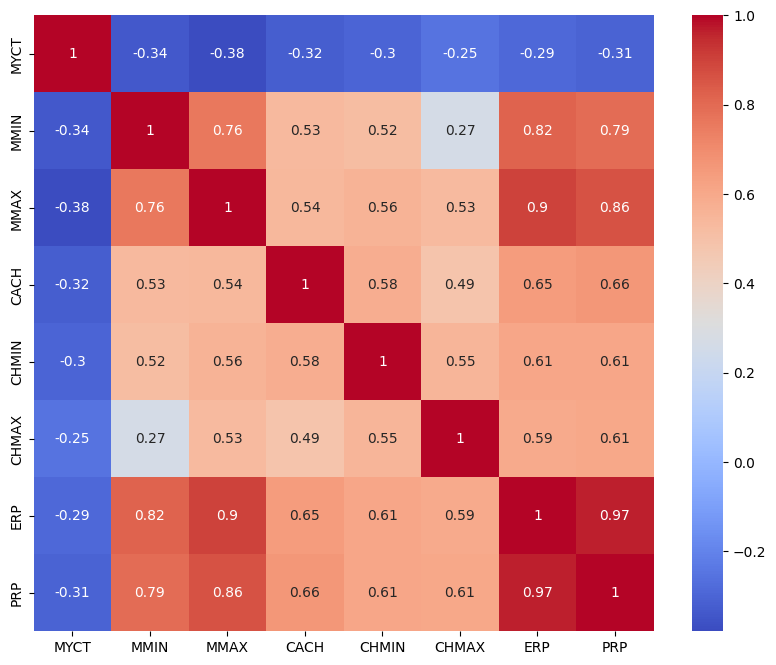

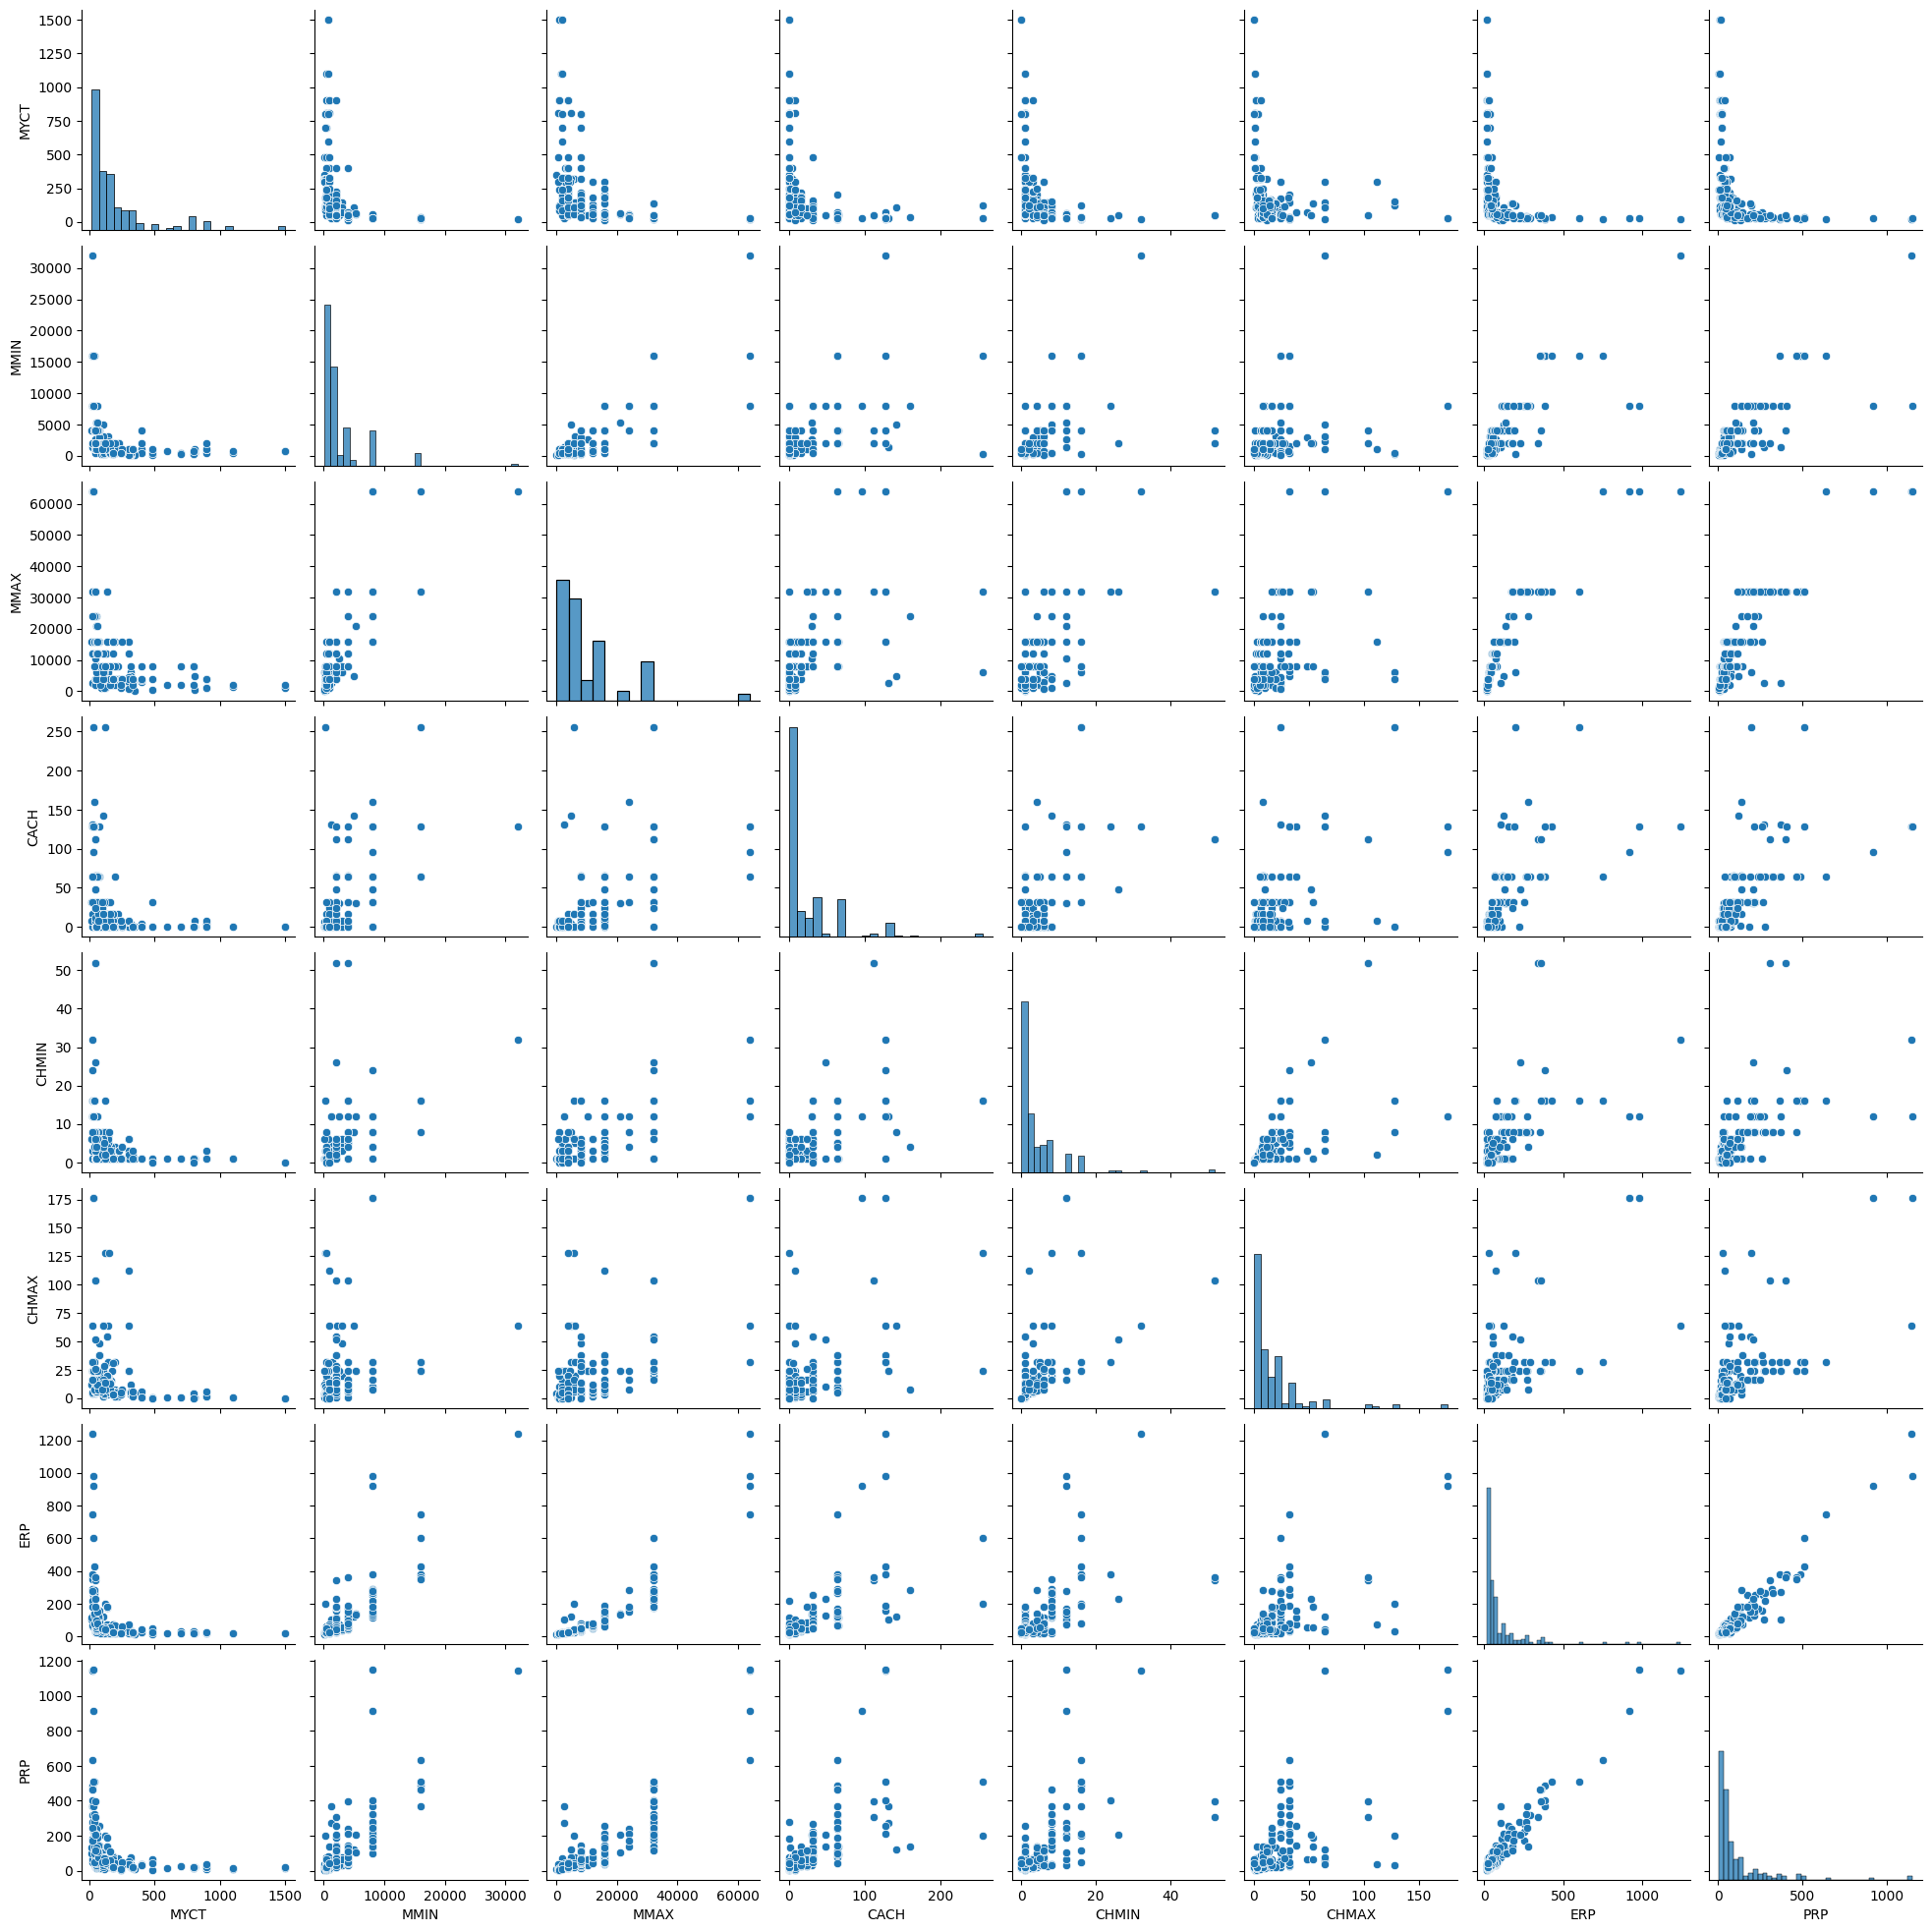

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵으로 상관관계 확인
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# 산점도 행렬
sns.pairplot(data)
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression

# 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 성능 평가
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 교차 검증
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print(f'Train MSE: {mse_train}, Train MAE: {mae_train}, Train R2: {r2_train}')
print(f'Test MSE: {mse_test}, Test MAE: {mae_test}, Test R2: {r2_test}')
print(f'Cross-validation R2 scores: {cv_scores}')
print(f'Cross-validation mean R2: {cv_scores.mean()}')


Train MSE: 1529.020470551296, Train MAE: 23.232255784639317, Train R2: 0.9204648044109383
Test MSE: 2370.096374775847, Test MAE: 31.406218675535634, Test R2: 0.9534424890368541
Cross-validation R2 scores: [0.85060539 0.75851864 0.80002955 0.89072312 0.9400806 ]
Cross-validation mean R2: 0.847991461557509


In [7]:
from sklearn.preprocessing import PolynomialFeatures

# 다항 특성 생성
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# 다항 회귀 모델 학습
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# 예측
y_poly_train_pred = poly_model.predict(X_poly_train)
y_poly_test_pred = poly_model.predict(X_poly_test)

# 성능 평가
mse_poly_train = mean_squared_error(y_train, y_poly_train_pred)
mae_poly_train = mean_absolute_error(y_train, y_poly_train_pred)
r2_poly_train = r2_score(y_train, y_poly_train_pred)

mse_poly_test = mean_squared_error(y_test, y_poly_test_pred)
mae_poly_test = mean_absolute_error(y_test, y_poly_test_pred)
r2_poly_test = r2_score(y_test, y_poly_test_pred)

print(f'Polynomial Train MSE: {mse_poly_train}, Train MAE: {mae_poly_train}, Train R2: {r2_poly_train}')
print(f'Polynomial Test MSE: {mse_poly_test}, Test MAE: {mae_poly_test}, Test R2: {r2_poly_test}')


Polynomial Train MSE: 1232.0804869274607, Train MAE: 24.730891562541, Train R2: 0.9359107582948776
Polynomial Test MSE: 306169.2534469269, Test MAE: 115.39205321221657, Test R2: -5.0143032686937135


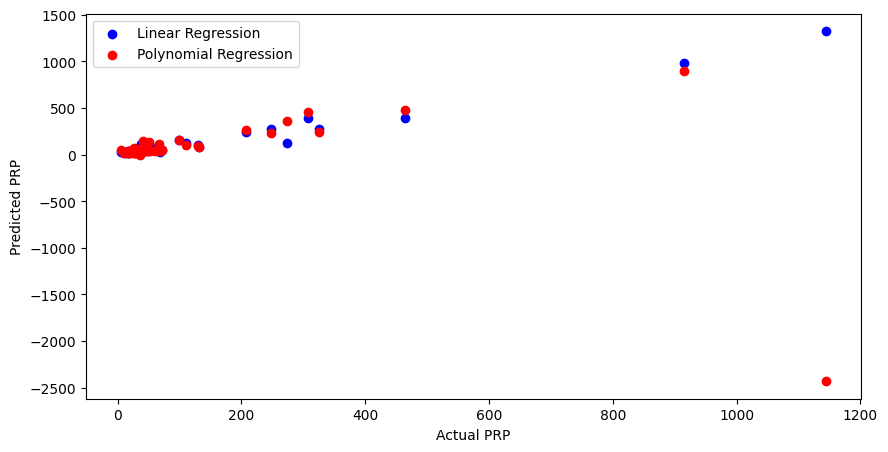

In [8]:
plt.figure(figsize=(10, 5))

# 실제 값 vs 예측 값 (테스트 데이터)
plt.scatter(y_test, y_test_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, y_poly_test_pred, color='red', label='Polynomial Regression')
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.legend()
plt.show()
